In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

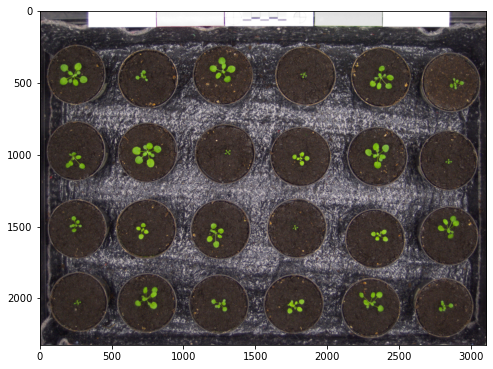

In [12]:
# Abrindo uma imagem

img = np.array(Image.open('images/exemplo1.png'))
_ = plt.figure(figsize=(8,8))
_ = plt.imshow(img)

In [4]:
# Detalhes da image

print(f"A imagem tem # dimensões: {img.ndim}")  # A imagem tem 3 dimensões pois é constituida de uma lista
                                                # de listas de listas. Isso pode ser compreendido da seguinte maneira:
                                                # Cada pixel é uma lista do tipo [R, G, B]. Cada linha é uma lista de pixels.
                                                # A imagem é uma lista das linhas.


print(f"A forma da imagem é: {img.shape}")
print(f"Dtype: {img.dtype}")
x = 10
y =10
print(f"Valor do pixel na posição ({x}, {y}): {img[x, x]}")                  # Valor na escala [R, G, B]
print(f"O Valor mínimo de Vermelho (R) na imagem é: {img[:, :, 0].min()}")   # Dessa forma, obtemos um array com 2 dimensões.
                                                                             # A lista [R, G, B] foi substituída pelos valores 
                                                                             # vermelho. Depois, extraímos o mínimo.
                                                                    

A imagem tem # dimensões: 3
A forma da imagem é: (2324, 3108, 3)
Dtype: uint8
Valor do pixel na posição (10, 10): [91 90 88]
O Valor mínimo de Vermelho (R) na imagem é: 0


In [5]:
# Testando numpy arrays...

matriz = []
cont = 1
for i in range(0, 10):
    linha = []
    for j in range(0, 10):
        linha.append(cont)
        cont += 1
    matriz.append(linha)

teste = np.array(matriz)
print(teste)
print(teste.ndim)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
2


In [6]:
# Para salvar um ndarray como imagem:

caminho = "images/exemploSalvo.png"
pil_img = Image.fromarray(img)
pil_img.save(caminho)


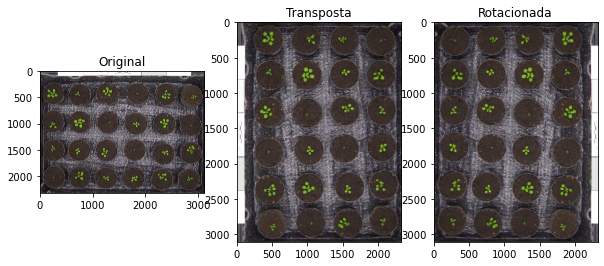

In [51]:
# Algoritmo para rotacionar uma imagem (matriz):

img = np.array(Image.open('images/exemplo1.png'))

degrees = 90

fig = plt.figure(figsize=(10, 10))
_ = fig.add_subplot(1, 3, 1)   # grid 1x2 1st subplot (image)
                           # Aqui, usaremos subplots de matplotlib para mostrar a imagem antes e depois de ter sido rotacionada

_ = plt.imshow(img)
_ = plt.title("Original")

img1 = img.copy()
_ = fig.add_subplot(1, 3, 2)
img1 = img1.transpose(1, 0, 2)
_ = plt.imshow(img1)
_ = plt.title("Transposta")

img0 = img.copy()

for i in range(degrees // 90):  # divisão inteira por 90. Aqui giraremos a figura somente em algum mútiplo de 90 graus.
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):   #img0.shape retorna as dimensões do array (3108 linhas, 2324 colunas, 3 cores por pixel (RGB))
                                             #img0.shape[1] retorna a quantidade de colunas, então dividimos a quantidade de colunas por 2
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[:, img0.shape[1]-j-1, :]  # Estamos trocando as colunas da matriz transposta. 1 com última, 2 com penultima, ...
        img0[:, img0.shape[1]-j-1, :] = c

_ = fig.add_subplot(1, 3, 3)
_ = plt.imshow(img0)
_ = plt.title("Rotacionada")



In [45]:
teste = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
                  [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
                  [[19, 20, 21], [22, 23, 24], [25, 26, 27]]])
teste

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [49]:
teste.transpose(1, 0, 2)  # Indica a permutação dos eixos. (axes) Aqui linhas viram colunas
                          #  1-3    4-6    7-9
                          # 10-12  13-15  16-18
                          # 19-21  22-24  25-27


                          #  1-3    10-12   19-20
                          #  4-6    13-15   22-24
                          #  7-9    16-18   25-27

array([[[ 1,  2,  3],
        [10, 11, 12],
        [19, 20, 21]],

       [[ 4,  5,  6],
        [13, 14, 15],
        [22, 23, 24]],

       [[ 7,  8,  9],
        [16, 17, 18],
        [25, 26, 27]]])